In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA

# feature selection RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature selection chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature selection from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier


import warnings # current verimport matplotlib.pyplot as pltsion of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#===================================#
# Lecture de données
filename = "covtype.data"


inf=[""]*55
names=["Elevation","Aspect","Slope",
       "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
       "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
       "Horizontal_Distance_To_Fire_Points",'Wilderness_Area_1','Wilderness_Area_2',
       'Wilderness_Area_3','Wilderness_Area_4']
inf[0:len(names)]=names
print(len(names))       
sole_type=[]
    
for i in range(len(names),54):
    val = "Soil_Type_"+str(i-len(names)+1)
    inf[i]=val
    sole_type.append(val)
inf[54]="Cover_Type"

data = pd.read_csv(filename,names= inf)
data.head(2)

#============================================#
# Data (laod data)
X = data.drop(["Cover_Type","Vertical_Distance_To_Hydrology"],axis=1)
Y = data["Cover_Type"]
y = data["Cover_Type"]
#==========================================#

# load data
K = 10 # number of feature to select

# feature extraction
test = SelectKBest(score_func=chi2, k=K)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)
features = fit.transform(X)
indices_of_feature = np.flip(np.argsort(fit.scores_))
indices_of_first_feature =indices_of_feature[0:K]
feature_name_SelectKBest = np.take(inf,np.sort(indices_of_first_feature))

model = ExtraTreesClassifier()
model.fit(X, Y)
indices_of_feature = np.flip(np.argsort(model.feature_importances_))
#print(indices_of_feature)
indices_of_first_feature =indices_of_feature[0:K]
feature_name_ExtraTreeClassifier = np.take(inf,np.sort(indices_of_first_feature))

# comparaison des deux modèles
print("feature_name_SelectKBest",feature_name_SelectKBest)
print("\n=====================\n")
print("\n=====================\n1")
print("feature_name_ExtraTreeClassifier",feature_name_ExtraTreeClassifier)



14
feature_name_SelectKBest ['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Hillshade_3pm' 'Wilderness_Area_3'
 'Soil_Type_3' 'Soil_Type_9' 'Soil_Type_37']



1
feature_name_ExtraTreeClassifier ['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm' 'Wilderness_Area_3']


In [2]:
print(feature_name_SelectKBest)

['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Hillshade_3pm' 'Wilderness_Area_3'
 'Soil_Type_3' 'Soil_Type_9' 'Soil_Type_37']


In [4]:
Cover_type_4 = data.loc[data["Cover_Type"]==4]
length=  len(Cover_type_4)

Cover_type_1 = data.loc[data["Cover_Type"]==1].iloc[0:length,:]
Cover_type_2 = data.loc[data["Cover_Type"]==2].iloc[0:length,:]
Cover_type_3 = data.loc[data["Cover_Type"]==3].iloc[0:length,:]
Cover_type_5 = data.loc[data["Cover_Type"]==5].iloc[0:length,:]
Cover_type_6 = data.loc[data["Cover_Type"]==6].iloc[0:length,:]
Cover_type_7 = data.loc[data["Cover_Type"]==7].iloc[0:length,:]

frames = [Cover_type_1,Cover_type_2,Cover_type_3,Cover_type_4,Cover_type_5,Cover_type_6,Cover_type_7]
N_data = pd.concat(frames)


y = N_data["Cover_Type"]

Cover_type_1 = data.loc[data["Cover_Type"]==1]
Cover_type_2 = data.loc[data["Cover_Type"]==2]
frames = [Cover_type_1,Cover_type_2]
data_2_Classes = pd.concat(frames)
y2 = data_2_Classes["Cover_Type"]

In [5]:
important_features = ['Elevation','Aspect' ,'Slope', 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology' ,'Hillshade_3pm' ,'Wilderness_Area_3']
y = N_data["Cover_Type"]

data_variable_selection = N_data[important_features]
data_variable_selection_2_class = data_2_Classes[important_features]


In [7]:
# process dataset, split into training and tst part
Xs = StandardScaler().fit_transform(data_variable_selection)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=.3, random_state=42)

Xs2 = StandardScaler().fit_transform(data_variable_selection_2_class)
X2_train, X2_test, y2_train, y2_test = train_test_split(Xs2, y2, test_size=.3, random_state=42)

Xs22 = StandardScaler().fit_transform(data_2_Classes)
X22_train, X22_test, y22_train, y22_test = train_test_split(Xs22, y2, test_size=.3, random_state=42)


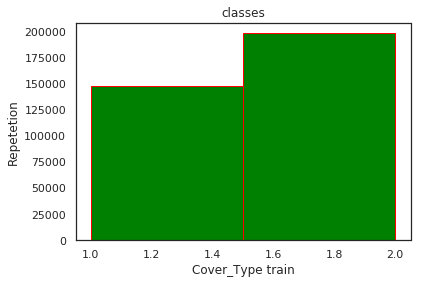

In [6]:
plt.hist(y2_train, range = (1, 2), bins = 2, color = 'green',
            edgecolor = 'red')
plt.xlabel('Cover_Type train')
plt.ylabel('Repetetion')
plt.title('classes')
plt.show()

In [22]:
names = ["Nearest Neighbors", 
         "Decision Tree",
         "Random Forest", 
         "Neural Net",
         "AdaBoost",
         "Naive Bayes", 
         "QDA"]#,
         #"Linear SVM",
         #"RBF SVM"],
         #"Gaussian Process"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=7),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]#,
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1)],
    #GaussianProcessClassifier(1.0 * RBF(1.0))]
print("iciciccicici")
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(name ,":", score)


iciciccicici
Nearest Neighbors : 0.7261223782284625
Decision Tree : 0.6593863754550182
Random Forest : 0.6527994453111458
Neural Net : 0.6912809845727163
AdaBoost : 0.40908302998786616
Naive Bayes : 0.4855260877101751
QDA : 0.48153926157046284


In [27]:
# process dataset, split into training and tst part
Xs = StandardScaler().fit_transform(N_data)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=.2, random_state=42)

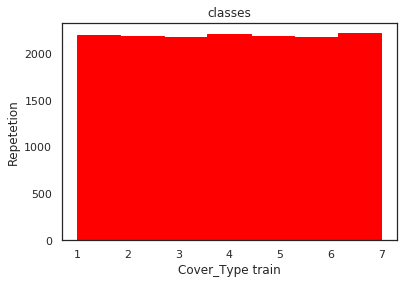

In [32]:
plt.hist(y_train, range = (1, 7), bins = 7, color = 'red',
            edgecolor = 'red')
plt.xlabel('Cover_Type train')
plt.ylabel('Repetetion')
plt.title('classes')
plt.show()

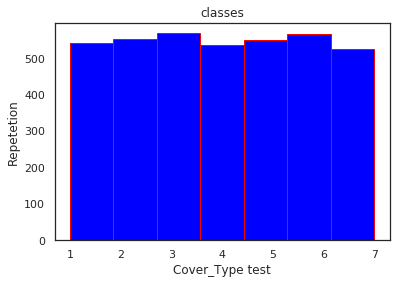

In [33]:
plt.hist(y_test, range = (1, 7), bins = 7, color = 'blue',
            edgecolor = 'red')
plt.xlabel('Cover_Type test')
plt.ylabel('Repetetion')
plt.title('classes')
plt.show()

In [28]:
names = ["Nearest Neighbors", 
         "Decision Tree",
         "Random Forest", 
         "Neural Net",
         "AdaBoost",
         "Naive Bayes", 
         "QDA"]#,
         #"Linear SVM",
         #"RBF SVM"],
         #"Gaussian Process"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=7),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]#,
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1)],
    #GaussianProcessClassifier(1.0 * RBF(1.0))]
print("iciciccicici")
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(name ,":", score)

iciciccicici
Nearest Neighbors : 0.9271970878835153
Decision Tree : 1.0
Random Forest : 0.8660946437857514
Neural Net : 0.9968798751950078
AdaBoost : 0.4173166926677067
Naive Bayes : 1.0
QDA : 1.0


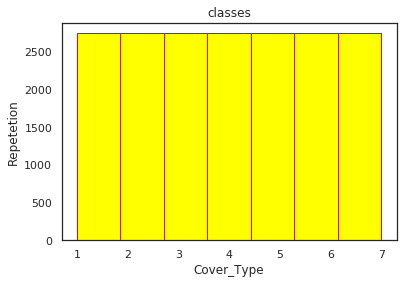

In [29]:
plt.hist(y, range = (1, 7), bins = 7, color = 'yellow',
            edgecolor = 'red')
plt.xlabel('Cover_Type')
plt.ylabel('Repetetion')
plt.title('classes')
plt.show()

In [7]:
print("Classification 2 classes not all variables")
names = ["Nearest Neighbors", 
         "Decision Tree",
         "Random Forest", 
         "Neural Net",
         "AdaBoost",
         "Naive Bayes", 
         "QDA"]#,
         #"Linear SVM",
         #"RBF SVM"],
         #"Gaussian Process"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=7),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]#,
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1)],
    #GaussianProcessClassifier(1.0 * RBF(1.0))]
print("iciciccicici")
for name, clf in zip(names, classifiers):
        clf.fit(X2_train, y2_train)
        score = clf.score(X2_test, y2_test)
        print(name ,":", score)

Classification
iciciccicici
Nearest Neighbors : 0.8385585318729257
Decision Tree : 0.7604599341604787
Random Forest : 0.7616717044896091
Neural Net : 0.7675151302989707
AdaBoost : 0.7648626996896521
Naive Bayes : 0.7439192691678503
QDA : 0.7493991638784729


In [ ]:
print("Classification 2 classes all variables")
names = ["Nearest Neighbors", 
         "Decision Tree",
         "Random Forest", 
         "Neural Net",
         "AdaBoost",
         "Naive Bayes", 
         "QDA"]#,
         #"Linear SVM",
         #"RBF SVM"],
         #"Gaussian Process"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=7),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]#,
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1)],
    #GaussianProcessClassifier(1.0 * RBF(1.0))]
print("iciciccicici")
for name, clf in zip(names, classifiers):
        clf.fit(X22_train, y22_train)
        score = clf.score(X22_test, y22_test)
        print(name ,":", score)

Classification 2 classes all variables
iciciccicici
